<a href="https://colab.research.google.com/github/burlharlin/sales-predictions/blob/main/sales_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd



In [2]:
from google.colab import drive
drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
filename = '/content/drive/MyDrive/Coding Dojo/02 Week 2: Pandas/sales_predictions.csv'

df = pd.read_csv(filename)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
df.info()
#1)Rows 8523; Columns 12
#2) See Dtype Below

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [5]:
df.duplicated().sum()
#There were no duplicates

0

In [6]:
df.isna().sum()
#4) Missing Data---Item_Wieght:1463; Outlet:2410
# Data was removed 

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [7]:
df.describe()


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [8]:
df.nunique()


Item_Identifier              1559
Item_Weight                   415
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [9]:
df.groupby('Outlet_Size')['Item_Identifier'].count()
# Im going to remove both columns for now, but I will run another one for Outlet_size with 'missing' added

Outlet_Size
High       932
Medium    2793
Small     2388
Name: Item_Identifier, dtype: int64

In [10]:
df.groupby('Item_Fat_Content')['Item_Identifier'].count()

Item_Fat_Content
LF          316
Low Fat    5089
Regular    2889
low fat     112
reg         117
Name: Item_Identifier, dtype: int64

In [11]:
df.drop(columns=['Item_Weight','Outlet_Size'], inplace = True)
df.isna().sum()

Item_Identifier              0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [12]:
df.head()

,Item_Identifier,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Tier 1,Supermarket Type1,3735.1380
1,DRC01,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Tier 3,Supermarket Type2,443.4228
2,FDN15,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Tier 1,Supermarket Type1,2097.2700
3,FDX07,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Tier 3,Grocery Store,732.3800
4,NCD19,Low Fat,0.000000,Household,53.8614,OUT013,1987,Tier 3,Supermarket Type1,994.7052


In [13]:
import numpy as np


In [14]:
df.describe()

,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000
mean,0.066132,140.992782,1997.831867,2181.288914
std,0.051598,62.275067,8.371760,1706.499616
min,0.000000,31.290000,1985.000000,33.290000
25%,0.026989,93.826500,1987.000000,834.247400
50%,0.053931,143.012800,1999.000000,1794.331000
75%,0.094585,185.643700,2004.000000,3101.296400
max,0.328391,266.888400,2009.000000,13086.964800


In [15]:
df.groupby('Item_Fat_Content')['Item_Identifier'].count()

Item_Fat_Content
LF          316
Low Fat    5089
Regular    2889
low fat     112
reg         117
Name: Item_Identifier, dtype: int64

In [16]:
df['Item_Fat_Content'].replace({'LF': 'Low Fat', 'low fat':'Low Fat','reg':'Regular'}, inplace = True)

In [17]:
df.groupby('Item_Fat_Content')['Item_Identifier'].count()

Item_Fat_Content
Low Fat    5517
Regular    3006
Name: Item_Identifier, dtype: int64

In [18]:
df['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [19]:
df['Outlet_Establishment_Year'].value_counts()

1985    1463
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: Outlet_Establishment_Year, dtype: int64

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
import pandas as pd

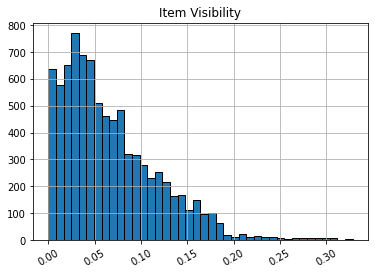

In [22]:
df['Item_Visibility'].hist(bins = 40, edgecolor= 'black')
plt.xticks(rotation = 30);
plt.title("Item Visibility");

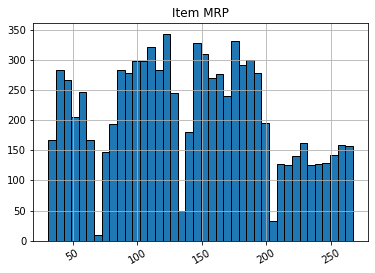

In [23]:
df['Item_MRP'].hist(bins = 40, edgecolor= 'black')
plt.xticks(rotation = 30);
plt.title("Item MRP");

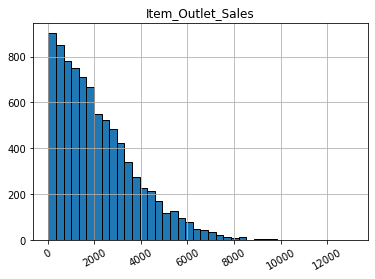

In [24]:
df['Item_Outlet_Sales'].hist(bins = 40, edgecolor= 'black')
plt.xticks(rotation = 30);
plt.title('Item_Outlet_Sales');

In [25]:
corr = df.corr()

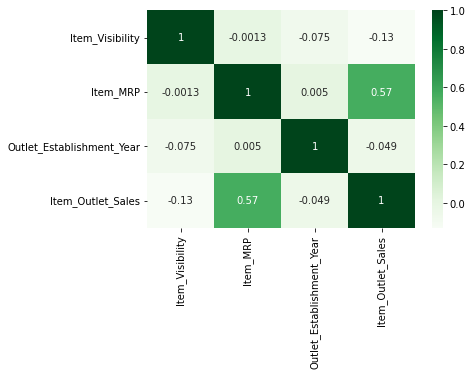

In [26]:
sns.heatmap(corr, cmap = 'Greens', annot= True);

In [27]:
df.head()

,Item_Identifier,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Tier 1,Supermarket Type1,3735.1380
1,DRC01,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Tier 3,Supermarket Type2,443.4228
2,FDN15,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Tier 1,Supermarket Type1,2097.2700
3,FDX07,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Tier 3,Grocery Store,732.3800
4,NCD19,Low Fat,0.000000,Household,53.8614,OUT013,1987,Tier 3,Supermarket Type1,994.7052


In [28]:
Tier_Count = df['Outlet_Location_Type'].value_counts()
Tier_Count

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [29]:
Outlet_Count = df['Outlet_Type'].value_counts()
Outlet_Count


Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

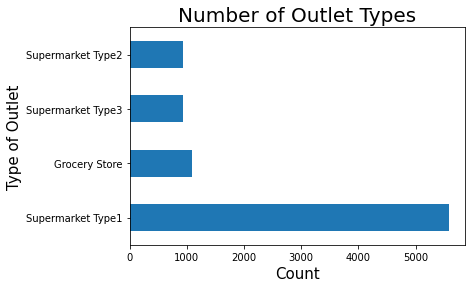

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [30]:
Outlet_Count.plot(kind = 'barh')
plt.title('Number of Outlet Types', fontsize = 20)
plt.ylabel('Type of Outlet',fontsize = 15)
plt.xlabel('Count',fontsize = 15)
plt.show()
Outlet_Count

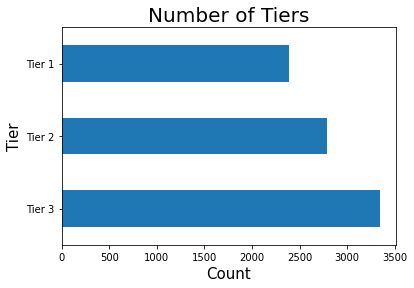

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [31]:
Tier_Count.plot(kind = 'barh')
plt.title('Number of Tiers', fontsize = 20)
plt.ylabel('Tier',fontsize = 15)
plt.xlabel('Count',fontsize = 15)
plt.show()
Tier_Count

In [32]:
df.groupby('Outlet_Type')['Item_Outlet_Sales'].sum()

Outlet_Type
Grocery Store        3.680343e+05
Supermarket Type1    1.291734e+07
Supermarket Type2    1.851823e+06
Supermarket Type3    3.453926e+06
Name: Item_Outlet_Sales, dtype: float64

In [33]:
df.groupby('Outlet_Type')['Item_Outlet_Sales'].mean()

Outlet_Type
Grocery Store         339.828500
Supermarket Type1    2316.181148
Supermarket Type2    1995.498739
Supermarket Type3    3694.038558
Name: Item_Outlet_Sales, dtype: float64

In [34]:
df.groupby('Item_Type')['Item_Outlet_Sales'].mean()

Item_Type
Baking Goods             1952.971207
Breads                   2204.132226
Breakfast                2111.808651
Canned                   2225.194904
Dairy                    2232.542597
Frozen Foods             2132.867744
Fruits and Vegetables    2289.009592
Hard Drinks              2139.221622
Health and Hygiene       2010.000265
Household                2258.784300
Meat                     2158.977911
Others                   1926.139702
Seafood                  2326.065928
Snack Foods              2277.321739
Soft Drinks              2006.511735
Starchy Foods            2374.332773
Name: Item_Outlet_Sales, dtype: float64

In [75]:
 Item_Sales = round(df.groupby(['Item_Type','Outlet_Type'])['Item_Outlet_Sales'].describe(),0)
 Item_Sales

count    mean     std    min     25%     50%  \
Item_Type     Outlet_Type                                                       
Baking Goods  Grocery Store       85.0   292.0   199.0   37.0   144.0   224.0   
              Supermarket Type1  426.0  2102.0  1431.0  127.0  1007.0  1765.0   
              Supermarket Type2   68.0  1780.0  1222.0  253.0  1006.0  1538.0   
              Supermarket Type3   69.0  3249.0  1766.0  625.0  1957.0  3147.0   
Breads        Grocery Store       33.0   382.0   307.0   35.0   200.0   330.0   
...                                ...     ...     ...    ...     ...     ...   
Soft Drinks   Supermarket Type3   45.0  3285.0  2362.0  559.0  1305.0  2694.0   
Starchy Foods Grocery Store       13.0   300.0   229.0   59.0   164.0   185.0   
              Supermarket Type1  104.0  2550.0  1716.0  252.0  1085.0  2232.0   
              Supermarket Type2   17.0  1948.0  1198.0  154.0  1212.0  1657.0   
              Supermarket Type3   14.0  3512.0  2062.0  811.0  1698.0  3837.0   

                                    75%     max  
Item_Type     Outlet_Type                        
Baking Goods  Grocery Store       393.0   792.0  
              Supermarket Type1  2868.0  7932.0  
              Supermarket Type2  2143.0  5851.0  
              Supermarket Type3  4278.0  7760.0  
Breads        Grocery Store       471.0  1524.0  
...                                 ...     ...  
Soft Drinks   Supermarket Type3  4111.0  9554.0  
Starchy Foods Grocery Store       370.0   852.0  
              Supermarket Type1  3609.0  8132.0  
              Supermarket Type2  3200.0  3795.0  
              Supermarket Type3  4503.0  7444.0  

[64 rows x 8 columns]

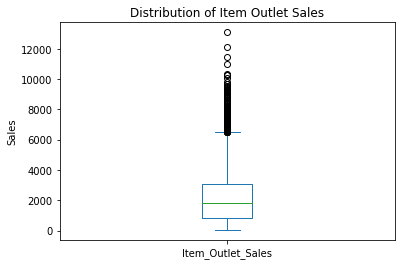

In [36]:
df['Item_Outlet_Sales'].plot(kind='box');
plt.title('Distribution of Item Outlet Sales')
plt.ylabel('Sales');

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


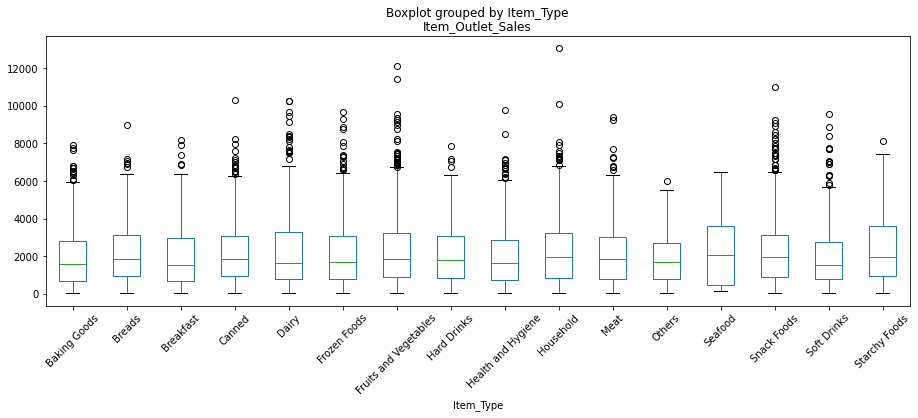

In [37]:

df.boxplot('Item_Outlet_Sales',
  by = 'Item_Type',
  figsize = (15,5),
  rot = 45,
  grid=False
)



/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


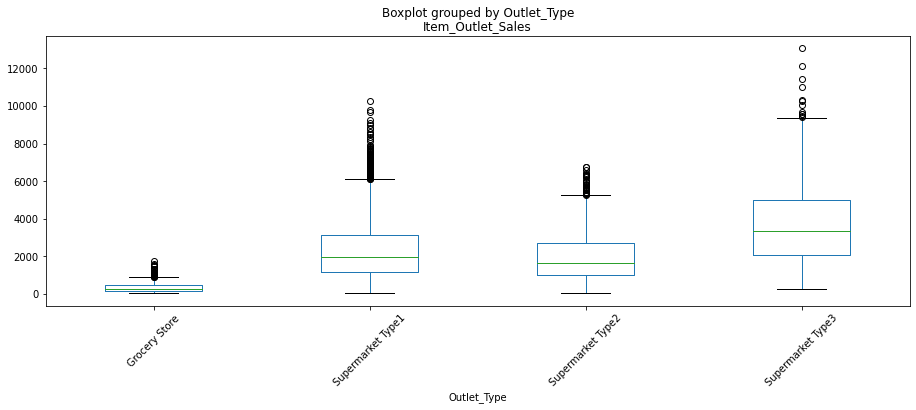

In [38]:
df.boxplot('Item_Outlet_Sales',
  by = 'Outlet_Type',
  figsize = (15,5),
  rot = 45,
  grid=False
)

PART 4 of Project ONE


In [45]:
groupby_items = round(df.groupby(['Item_Type','Outlet_Location_Type'])['Item_Outlet_Sales'].sum(),0)
groupby_items

Item_Type              Outlet_Location_Type
Baking Goods           Tier 1                   326773.0
                       Tier 2                   433106.0
                       Tier 3                   505646.0
Breads                 Tier 1                   137309.0
                       Tier 2                   191129.0
                       Tier 3                   224799.0
Breakfast              Tier 1                    50577.0
                       Tier 2                    77357.0
                       Tier 3                   104365.0
Canned                 Tier 1                   327962.0
                       Tier 2                   545605.0
                       Tier 3                   570584.0
Dairy                  Tier 1                   370911.0
                       Tier 2                   525673.0
                       Tier 3                   626010.0
Frozen Foods           Tier 1                   474369.0
                       Tier 2               

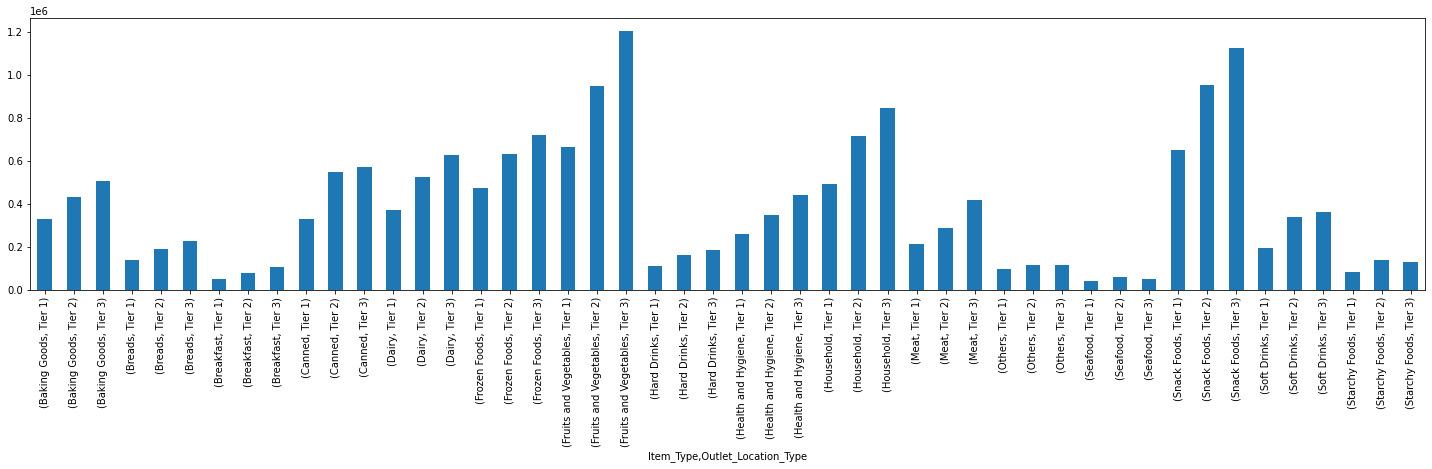

In [49]:
groupby_items.plot(kind = 'bar',
figsize = (25,5)


)

In [50]:
groupby_type = round(df.groupby(['Outlet_Location_Type','Item_Type',])['Item_Outlet_Sales'].sum(),0)
groupby_type

Outlet_Location_Type  Item_Type            
Tier 1                Baking Goods              326773.0
                      Breads                    137309.0
                      Breakfast                  50577.0
                      Canned                    327962.0
                      Dairy                     370911.0
                      Frozen Foods              474369.0
                      Fruits and Vegetables     663919.0
                      Hard Drinks               109312.0
                      Health and Hygiene        256979.0
                      Household                 492495.0
                      Meat                      212218.0
                      Others                     93835.0
                      Seafood                    39479.0
                      Snack Foods               650711.0
                      Soft Drinks               192764.0
                      Starchy Foods              82447.0
Tier 2                Baking Goods          

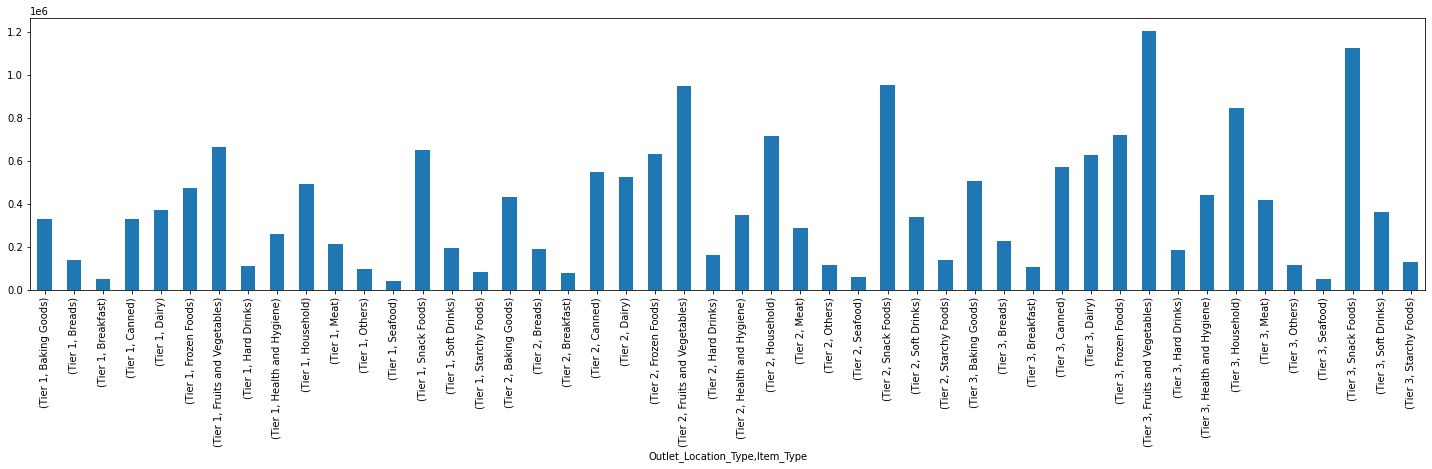

In [51]:
groupby_type.plot(kind = 'bar',
figsize = (25,5)


)

In [54]:
import matplotlib.pyplot as plt
import matplotlib as mpl


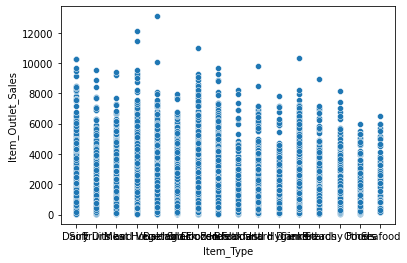

In [57]:
sns.scatterplot(data = df, x = 'Item_Type', y = 'Item_Outlet_Sales' )




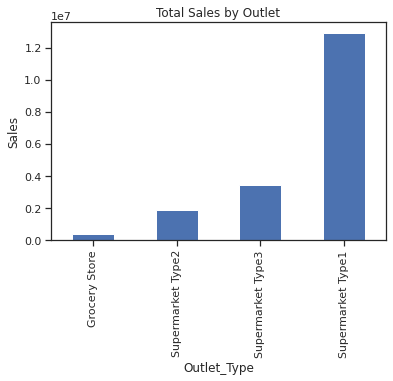

In [98]:
Total_Sales_by_Outlets_Types = df.groupby('Outlet_Type')['Item_Outlet_Sales'].sum().sort_values()
Total_Sales_by_Outlets_Types.plot(kind='bar')
plt.title('Total Sales by Outlet')
plt.ylabel('Sales');

## From looking the total sales by outlet type we can see that Type 1 is selling much more volume the other outlets.

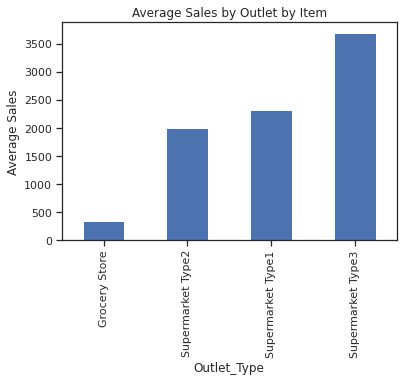

In [99]:
Average_Sales_by_Outlets_Types = df.groupby('Outlet_Type')['Item_Outlet_Sales'].mean().sort_values()
Average_Sales_by_Outlets_Types.plot(kind='bar')
plt.title('Average Sales by Outlet by Item')
plt.ylabel('Average Sales');

# This the average sales by item sold per outlet type. The Type 1 is not the top of the car chart here despite being the largest volume in sales. My thoughts are type 1 has more items to sales at a lower
#price point. Farther analysis is needed. 